



# Project: Why did the patients no-show?    
*Investigation on the dataset from 100K medical appointments in Brazil that might tell us what influenced the no-show behaviors of the patients*

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>    
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


In this report, we will investigate the factors that can explain why the patients made a no-show to a medical appointment and might predict who will make a no-show in the future. Mainly, we will go over three variables: **1) if the patients received an SMS that informs the appointment details,  2) age of the patients** and finally **3) the waiting time between the day the patients scheduled and the actual appointment day.**

Intuitively, we assume that the patients who recieved a notification via an SMS would not miss the appointment because they have the information with them all the time on the phone. Also, we often think that it is more likely for the older people to show up at the appointment while the young people will not show up because health issues are more critical to the elderly. Finally, it is easier for people to presume that the longer the waiting time, the higher the chance of no-show because people can get well naturally, they can find a faster appointment in another clinic or simply they can forget. 

We will investigate if our intuitive assumptions are correct by taking each of the three variables through the analysis. One important messages for you is that these findings is tentative in terms of prediction, as we did not use inferencial method. Let's find out what the data are actually telling us about the patients' behaviors. 

Click [here](https://www.kaggle.com/joniarroba/noshowappointments) to check out more information on the data source.

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In the dataset, a total of 110,527 patients' informations were collected on 14 related variables. 88,208 people showed up on time to the appointment while the rest of the 22,319 no-showed. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df = pd.read_csv('noshow-2016.csv')

>We just opened the CSV file for the data that we are going to analyze. Let's look at the first five lines of the data. 

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


>Now that we are curious about the summary of the dataset, so here are the statistics from the dataset.  

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>Now let's see how many data are included in the file. 

In [5]:
df.shape

(110527, 14)

>Before heading to the next step, I would like to check the types of the data. This will help us to know if we need to convert some data type for the analysis. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>Finally, we will check how many people actually no-showed by investigating the values of the "No-show" columns.

In [7]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

<a id='cleaning'></a>
### Data Cleaning 

Now we have a better idea on the general properties of the dataset, we will clean the data so that we can better perform our analysis. In this part, I changed the names of the three columns and deleted two columns that are less relavant to our analysis.

>First of all, I found a typo in the column name: "Handcap". I changed it into "Handicap". 

In [8]:
# corrected typo in the column name.
df.rename(columns={"Handcap":"Handicap"}, inplace = True)

>Let's see if the change was made correct. 

In [9]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


>Secondly, to make it easier for coding, I will make all letters lower cases. Also, I will change "-" in the column names for space into "_" to keep the consistency in the column names.  

In [10]:
# changed the column names to lower case and make consistency for spaces
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)

>Again, I will check if the changes were made as I intended. 

In [11]:
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


>Finally, I will drop the "patientid" and the "appointmentid' columns, becuase these columns are not the variables that we are going to analyze.  

In [12]:
# drop columns not relavant to the analysis
df.drop(['patientid', 'appointmentid'], axis=1, inplace=True)

>As you can see from the below, now the two columns are deleted. 

In [13]:
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

In this part, we will go through the three variables that were associated with our intuitive assumptions. First of all, we will check if the patients who received an SMS shows lower rate of no-show. Secondly, we will analyze the no-show rate for different age groups. Lastly, we will investigate if the longer waiting time affected patients' no-show behavior. 


###  Question 1: Will receiving an SMS notification help patients show up on time to their appointment?

>As for the first step, let's see how many patients actually received the SMS messages. As you can see from the histogram below, there are more than double the patients who did not received an SMS messages than those who did. 

In [21]:
import seaborn as sns
sns.set_style('darkgrid')

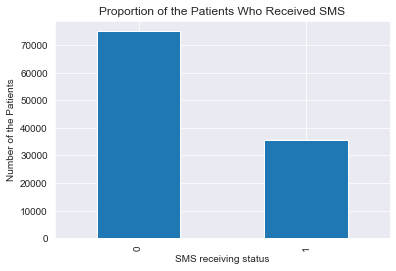

In [22]:
df['sms_received'].value_counts().plot.bar()
plt.ylabel('Number of the Patients')
plt.xlabel('SMS receiving status')
plt.title('Proportion of the Patients Who Received SMS');

>Then, let's see how the no-show rate is for each group by using group by. 

In [23]:
no_show_counts = df.groupby(['sms_received','no_show']).count()['age']
no_show_counts

sms_received  no_show
0             No         62510
              Yes        12535
1             No         25698
              Yes         9784
Name: age, dtype: int64

>Now we have the statistics for both groups, we will calculate the no-show rate for the people who did not received an SMS and for the people who received an SMS notification. 

In [24]:
sms_totals = df.groupby('sms_received').count()['age']
sms_totals

sms_received
0    75045
1    35482
Name: age, dtype: int64

>The calculation for those who did not received an SMS goes as follows: 

In [25]:
no_sms_proportions = no_show_counts[0] / sms_totals[0]
no_sms_proportions 

no_show
No     0.832967
Yes    0.167033
Name: age, dtype: float64

>The calculation for those who received an SMS goes as follows: 

In [26]:
yes_sms_proportions = no_show_counts[1] / sms_totals[1]
yes_sms_proportions 

no_show
No     0.724255
Yes    0.275745
Name: age, dtype: float64

>Now that we are done with the calcuations, let's make a bar graph to see the differences in no-show rate for each group. 

In [27]:
ind = np.arange(no_sms_proportions.iloc[1])  # the x locations for the groups
width = 0.35       # the width of the bars

In [28]:
sns.set_style('darkgrid')

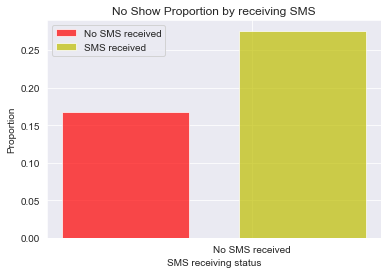

In [29]:
no_bars = plt.bar(ind, no_sms_proportions.iloc[1], width, color='r', alpha=.7, label='No SMS received')
yes_bars = plt.bar(ind + width*1.4, yes_sms_proportions.iloc[1], width, color='y', alpha=.7, label='SMS received')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('SMS receiving status')
plt.title('No Show Proportion by receiving SMS')
locations = ind + width   # xtick locations
labels= ['No SMS received', 'SMS received'] # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

**From the analysis of the first variable, we found out an interesting result that is contrary to our assumption. People who received an SMS nofification showed higher no-show rate. However, the rate can be changed if there are similar numbers of population for each group. In this dataset, there were more people who did not received an SMS notification by 100%. This could have influenced the result in some way.**

### Question 2: Will order people less likely to show-up and the younger people more likely to no-show?

In this second question, we will divide the population into the four age groups and compare the no-show rate in each group. For the grouping, I used the following definition for each age group. 


- **Child**: 12 years and under
- **Adolescence**: 13-18 years
- **Adult**: 19- 59 years
- **Senior Adult**: 60 years and above

>In order to group the data into age group, I will make an extra column that identifies the age group that each patient belongs to. We will use cut function for this. First, I will check the spread of the values in the 'age' column.  

In [30]:
df['age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

> Now that I have the min and the max value, I will create bin edges and bin names. Then, I will create a column 'age_group' that carries this information. 

In [31]:
bin_edges = [-1, 12, 18, 59, 115]

In [32]:
bin_names = ['Child','Adolescence' ,'Adult' ,'Senior Adult' ] 

In [33]:
df['age_group'] = pd.cut(df['age'], bin_edges, labels=bin_names)

> Here we can see that the new column is created. 

In [34]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Senior Adult
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Adult
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,Senior Adult
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Child
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Adult


> Now, I will calculate the no-show rate for each age group. I used the following codings for the calculations:

In [35]:
no_show_counts2 = df.groupby(['age_group','no_show']).count()['gender']
no_show_counts2

age_group     no_show
Child         No         16729
              Yes         4307
Adolescence   No          5790
              Yes         2040
Adult         No         47757
              Yes        12730
Senior Adult  No         17931
              Yes         3242
Name: gender, dtype: int64

In [36]:
age_totals = df.groupby('age_group').count()['gender']
age_totals

age_group
Child           21036
Adolescence      7830
Adult           60487
Senior Adult    21173
Name: gender, dtype: int64

In [45]:
age_group_proportion = df.groupby(['age_group', 'no_show']).size().div(df.groupby(['age_group']).size())
df_age_group_proportion =pd.DataFrame(age_group_proportion)
df_age_group_proportion

0
age_group    no_show          
Child        No       0.795256
             Yes      0.204744
Adolescence  No       0.739464
             Yes      0.260536
Adult        No       0.789542
             Yes      0.210458
Senior Adult No       0.846880
             Yes      0.153120

> Now we have all the necessary calculations, I will make a bar chart that shows the no-show rate for each age group. 

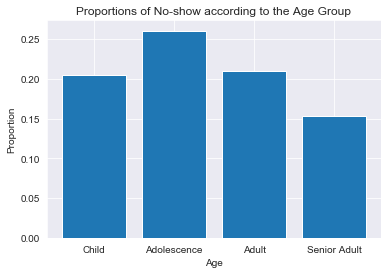

In [51]:
C = df_age_group_proportion[0].iloc[1]
A = df_age_group_proportion[0].iloc[3]
Ad = df_age_group_proportion[0].iloc[5]
Sd = df_age_group_proportion[0].iloc[7]

locations = [1, 2, 3, 4]
heights = [C, A, Ad, Sd]
labels = ['Child','Adolescence' ,'Adult' ,'Senior Adult']

plt.bar(locations, heights, tick_label=labels)
plt.title('Proportions of No-show according to the Age Group')
plt.xlabel('Age')
plt.ylabel('Proportion');


**As we can see, the no-show rate is the highest among the adolescence group and lowest among the senior adults. So, it does not show a linear tendancy that as the age goes up, the no-show rate decreases. However, we can still say that the older the patient is, the more they are likely to show up on-time to the medical appointment. The child and the adult group show almost similar no-show rate. Intuitively, this can be explained because in most cases, parents who belong to adult group will manage the schedules for the medical appointments for their children.**

>As for the next step, I will check how the demography is consisted of for the all patients and for each no-show and on-time patients group using pie chart. The first result shows us that in general there are the most adult, then follow the senior adult, child and adolescence. 

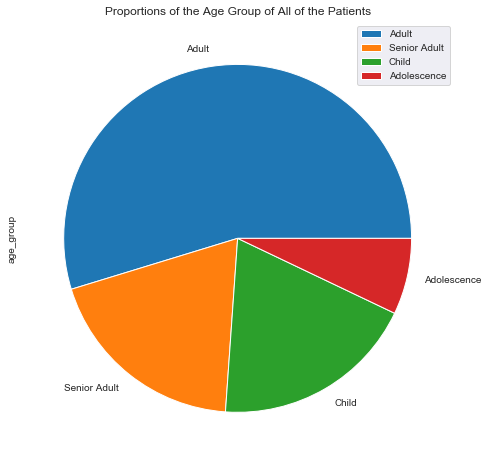

In [52]:
df['age_group'].value_counts().plot(kind='pie', figsize=(8,8))
plt.title('Proportions of the Age Group of All of the Patients')
plt.legend();

> Now I will check the age demography of the no-show patients. 

In [53]:
df_no_show_age = df.query('no_show == "Yes"')

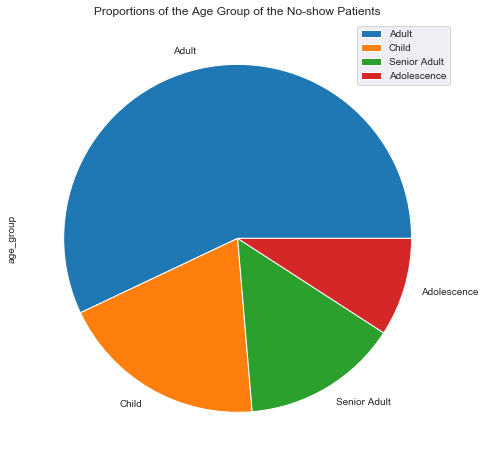

In [54]:
df_no_show_age['age_group'].value_counts().plot(kind='pie', figsize=(8,8))
plt.title('Proportions of the Age Group of the No-show Patients')
plt.legend();

> The pie chart above shows us that the rank between senior adult and the child groups have switched. It is explainable from the lower no-show rate among the senior adult group. Now, we will look at the age demography of the patients who showed up on-time. 

In [55]:
df_show_age = df.query('no_show == "No"')

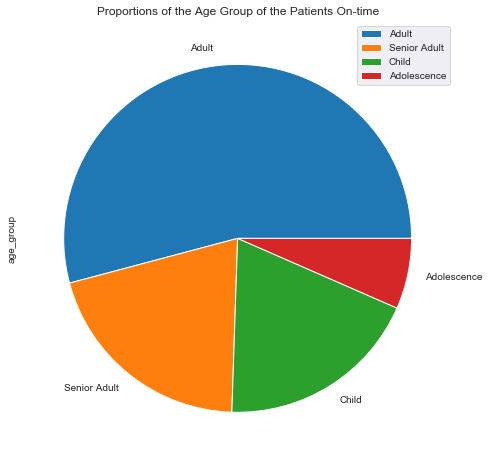

In [56]:
df_show_age['age_group'].value_counts().plot(kind='pie', figsize=(8,8))
plt.title('Proportions of the Age Group of the Patients On-time')
plt.legend();

> The most noticeable change is how the portion for the adolescence group decreased compared to the pie chart for all patients. It is explainable from the highest no-show rate of the adolescence group from our first analysis. 

### Question 3: Will longer waiting time hinter patients from attending the appointments on-time?

> In order to solve our third question, I will try to calculate the actual waiting time between the day that the patient scheduled the appointment and the actual appointment day. First, I will check how the 'scheduledday' and the 'appointmentday' column are recorded.

In [57]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Senior Adult
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Adult
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,Senior Adult
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Child
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Adult


>It looks like both of the columns are in datatype datetime already. Let's see how they really are with .info().

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   gender          110527 non-null  object  
 1   scheduledday    110527 non-null  object  
 2   appointmentday  110527 non-null  object  
 3   age             110527 non-null  int64   
 4   neighbourhood   110527 non-null  object  
 5   scholarship     110527 non-null  int64   
 6   hipertension    110527 non-null  int64   
 7   diabetes        110527 non-null  int64   
 8   alcoholism      110527 non-null  int64   
 9   handicap        110527 non-null  int64   
 10  sms_received    110527 non-null  int64   
 11  no_show         110527 non-null  object  
 12  age_group       110526 non-null  category
dtypes: category(1), int64(7), object(5)
memory usage: 10.2+ MB


>As they are both string type, I will change them into datetime so that I can calculate the waiting time. 

In [59]:
import time
from time import strptime

In [60]:
df['scheduledday']=pd.to_datetime(df['scheduledday'])

In [61]:
df['appointmentday']=pd.to_datetime(df['appointmentday'])

>Now I will check how the data in both the columns are changed. 

In [62]:
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Senior Adult


In [63]:
df.tail()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group
110522,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,Adult
110523,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,Adult
110524,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,Adult
110525,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,Adult
110526,F,2016-04-27 13:30:56+00:00,2016-06-07 00:00:00+00:00,54,MARIA ORTIZ,0,0,0,0,0,1,No,Adult


>Now I will calculate the waiting time by substracting 'scheduledday' column from the 'appointmentday' column. Also, I made a new column that carries this information with a name 'waiting_time'. 

In [64]:
df['waiting_time']=df['appointmentday']-df['scheduledday']

>Let's check both the first and the last five rows to see if our calculations were correct. 

In [65]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group,waiting_time
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Senior Adult,-1 days +05:21:52
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Adult,-1 days +07:51:33
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Senior Adult,-1 days +07:40:56
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Child,-1 days +06:30:29
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Adult,-1 days +07:52:37


In [66]:
df.tail()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group,waiting_time
110522,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,Adult,34 days 14:44:25
110523,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,Adult,34 days 16:32:27
110524,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,Adult,40 days 07:56:08
110525,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,Adult,40 days 08:50:37
110526,F,2016-04-27 13:30:56+00:00,2016-06-07 00:00:00+00:00,54,MARIA ORTIZ,0,0,0,0,0,1,No,Adult,40 days 10:29:04


>I only need the days in integer format for the 'waiting_time' column for the sake of visualization. I will change them into integer format. But first, let's check the current datatype for the 'waiting_time' column. 

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   gender          110527 non-null  object             
 1   scheduledday    110527 non-null  datetime64[ns, UTC]
 2   appointmentday  110527 non-null  datetime64[ns, UTC]
 3   age             110527 non-null  int64              
 4   neighbourhood   110527 non-null  object             
 5   scholarship     110527 non-null  int64              
 6   hipertension    110527 non-null  int64              
 7   diabetes        110527 non-null  int64              
 8   alcoholism      110527 non-null  int64              
 9   handicap        110527 non-null  int64              
 10  sms_received    110527 non-null  int64              
 11  no_show         110527 non-null  object             
 12  age_group       110526 non-null  category           
 13  waiting_time  

>Basically, in the following coding, I will extract integer form the 'waiting_time' columns so that we can only have the actual number of the waiting days in integer format. As we are only trying to see the correlation bewteen the waiting time and no-show, more detailed information such as time, minute and second are not important to this analysis. 

In [68]:
df['waiting_time']=df['waiting_time'].astype(str)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   gender          110527 non-null  object             
 1   scheduledday    110527 non-null  datetime64[ns, UTC]
 2   appointmentday  110527 non-null  datetime64[ns, UTC]
 3   age             110527 non-null  int64              
 4   neighbourhood   110527 non-null  object             
 5   scholarship     110527 non-null  int64              
 6   hipertension    110527 non-null  int64              
 7   diabetes        110527 non-null  int64              
 8   alcoholism      110527 non-null  int64              
 9   handicap        110527 non-null  int64              
 10  sms_received    110527 non-null  int64              
 11  no_show         110527 non-null  object             
 12  age_group       110526 non-null  category           
 13  waiting_time  

In [70]:
df['waiting_time']=df['waiting_time'].str.extract('(\d+)').astype(int)

In [71]:
df['waiting_time'].value_counts()

1      45288
3       5290
0       5213
6       4906
5       4037
       ...  
122        1
124        1
138        1
145        1
131        1
Name: waiting_time, Length: 128, dtype: int64

>Here I can check if the transformation was successful. 

In [72]:
df.head(20)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group,waiting_time
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Senior Adult,1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Adult,1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Senior Adult,1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Child,1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Adult,1
5,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,Senior Adult,1
6,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,Adult,1
7,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,Adult,1
8,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,No,Adult,1
9,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,Adult,1


> As for the next step, I will create histograms of the 'waiting_time' columns for both no-show and on-time patients groups. In this way, we can compare if there are any differences in the spread of the waiting time in each group that match the presumption.  

In [73]:
df_no_show = df.query('no_show == "Yes"')

In [74]:
df_show = df.query('no_show == "No"')

> Below is the histogram of the waiting days of the no-show group. As you can see, more than half of the appointments were made in less than 10 days. However, it is still spread to more days of waiting time. 

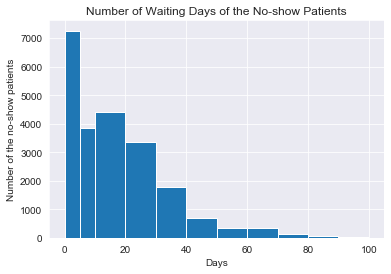

In [75]:
df_no_show['waiting_time'].hist(bins=[0, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90,100])

plt.title('Number of Waiting Days of the No-show Patients')
plt.xlabel('Days')
plt.ylabel('Number of the no-show patients');

>Below is the histogram that shows the spread of the waiting days of the patients that showed-up on time. Compared to the no-show group, it is more skewed to the right. Majority of the appointments were made in less than 5 days in advance.

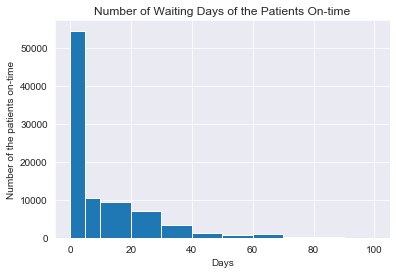

In [76]:
df_show['waiting_time'].hist(bins=[0, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90,100])

plt.title('Number of Waiting Days of the Patients On-time')
plt.xlabel('Days')
plt.ylabel('Number of the patients on-time');

>I was curious if there is any correlation between the age variable and the waiting time variable. So I tried to use scatter plot to see the correlation between both of them. 

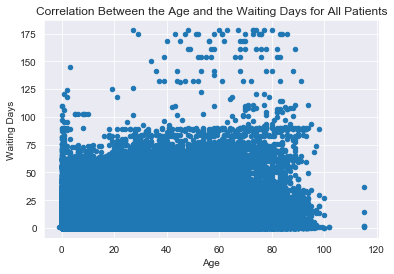

In [77]:
df.plot(x='age', y='waiting_time', kind='scatter')

plt.title('Correlation Between the Age and the Waiting Days for All Patients')
plt.xlabel('Age')
plt.ylabel('Waiting Days');

> In the all patients group, I could not observe correlation between the age and the waiting days. Just I could see the tendancy that waiting days of more than hundread days are more frequent in older age group. This tendancy is observed in both of the no-show and the on-time patients group as in the two following scatter plots. So I concluded that there is not a very clear correlation between the age and the waiting day variables. 

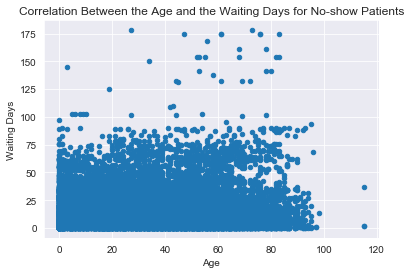

In [78]:
df_no_show.plot(x='age', y='waiting_time', kind='scatter')

plt.title('Correlation Between the Age and the Waiting Days for No-show Patients')
plt.xlabel('Age')
plt.ylabel('Waiting Days');

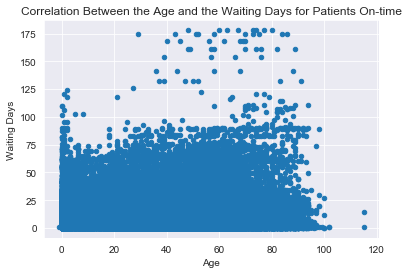

In [79]:
df_show.plot(x='age', y='waiting_time', kind='scatter')

plt.title('Correlation Between the Age and the Waiting Days for Patients On-time')
plt.xlabel('Age')
plt.ylabel('Waiting Days');

**From the third research, I could conclude that most of the patients who showed up on time made the appointment in 5 days and less in advance. From this obervation, we can say that the shorter as in five days the appointment is made, it is less likely that the patient no-shows.**

<a id='conclusions'></a>
## Conclusions

From our investigation, we have observed following conclusions regarding our innitial assumptions on the three variables that can relavant to the no-show behaviors of the patients. 


**1. SMS notification and no-show behavior:** contrary to the innitial assumption, the patient group who received an SMS notification showed higher rate of no-show. As there is fewer number of population for those who received an SMS, the result can change if there are equal numbers of people for both group. We can say that receiving an SMS did not reduced no-show rate from this investigation. In order to find out why a notification in advance did not help, a further research on the variables outside this dataset is required. 
    
    
**2. Age of the patients group and no-show behavior:** the no-show rate showed the highest among the adolescent group and the lowest among the senior adult group. We can say that the elderly are less likely to no-show a medical appointment from this observation. However, this is just a correlation and not a causation. There can be other variables between age and the no-show behavior such as an urgency of the medical status or chronic health issues that are more likely to be shown in the older people, which needs to be explored.  


**3. Waiting time an no-show behavior:** from the final investigation, we could oberved that the majority of the patients who showed up on time made their appointment in 5 days or less advance. From this obervation, we can say that patients who has a waiting time less than 5 days are more likely to show up. 

In [81]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset-Copy2.ipynb'])

0